# Step — 1: Importing Libraries - Loading Dataset

In [ ]:
#Script 1 — Importing the TensorFlow library (tf) and TensorFlow Datasets (tfds)

import tensorflow as tf
import tensorflow_datasets as tfds

#Script 2 — Loading the cats vs. dogs dataset
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteILZRAZ/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


#Step — 2: Dataset Visualization

Using a visualization tool to see 7 images and their labels from the dataset "Cats vs. Dogs".

Image: (262, 350, 3)
Label: 1


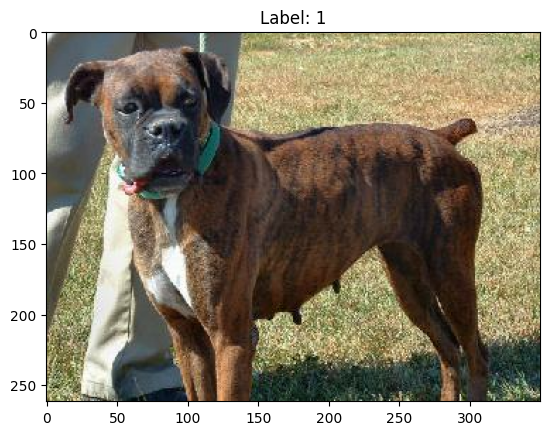

Image: (409, 336, 3)
Label: 1


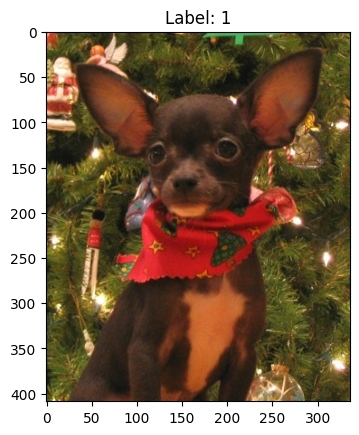

Image: (493, 500, 3)
Label: 1


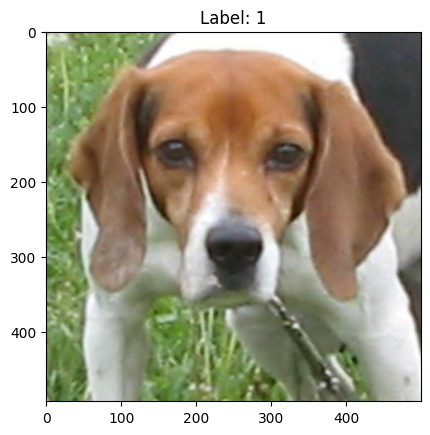

Image: (375, 500, 3)
Label: 0


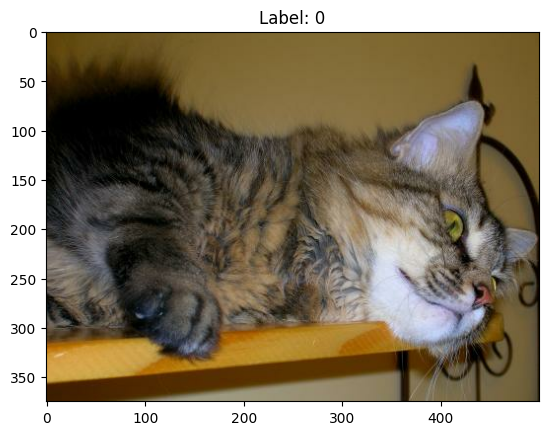

Image: (240, 320, 3)
Label: 1


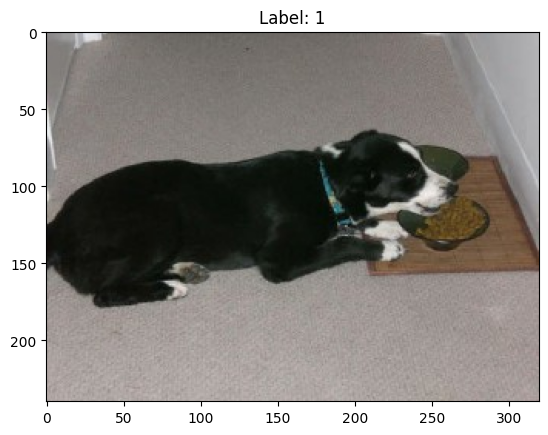

Image: (100, 100, 3)
Label: 1


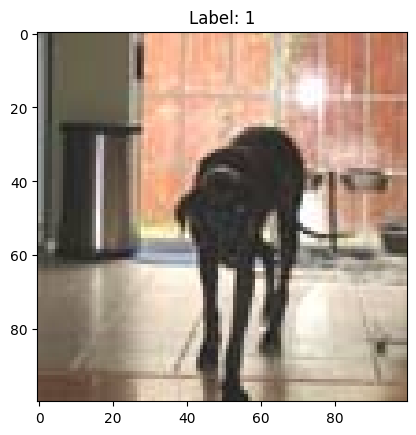

Image: (216, 182, 3)
Label: 0


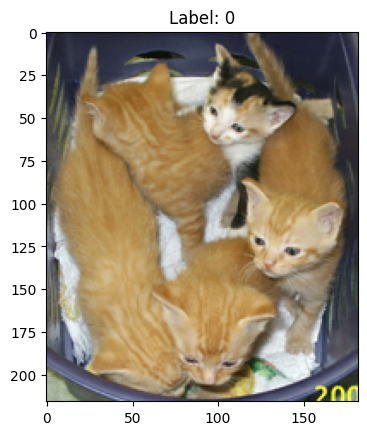

In [ ]:
#Script 3 — Using the iterator function/method to retrieve a small set of images (data) & display them with their corresponding labels.
#Please note: Cats are labeled as 0 while dogs are labeled as 1.
import numpy as np
import matplotlib.pyplot as plt

count = 0
for example in dataset.as_numpy_iterator():
    image = example['image']
    label = example['label']
    print(f"Image: {image.shape}")
    print(f"Label: {label}")

    # Displaying the image
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.show()

    count += 1
    if count == 7:
        break



#Step — 3:  Image Preprocessing

In [ ]:
#Script 3 —  Importing librares, function and modules, defining a function to preprocess all images.

from PIL import Image
from IPython.display import display
import random

def preprocess_image(element):
    image = element["image"]
    label = element["label"]

#1 — Resizing Images to a target size of 224x224 pixels using TensorFlow
    image = tf.image.resize(image, [224, 224], antialias=True)
    image = tf.cast(image, tf.float32) / 255.0

    return image, label
    return image, label

# Step — 4: Blackbox

 Here we define a simple CNN model with several convolutional layers followed by max-pooling layers, and then fully connected layers for classification. The final layer uses sigmoid activation since it's a binary classification task.

After creating the model, we  train it using the **preprocessed dataset**.
My dataframe is called **dataset**.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

def preprocess_image(element):
    image = element["image"]
    label = element["label"]
    image = tf.image.resize(element['image'], (224, 224))  # Adjust size as needed
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.cast(element['label'], tf.float32)
    return image, label

import tensorflow as tf
from tensorflow.keras import layers, models

# Apply preprocessing to the dataset
batch_size = 32
dataset = dataset.map(preprocess_image)
dataset = dataset.batch(batch_size)

def create_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        # Flatten the output and add fully connected layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create an instance of the model
model = create_model()

# Train the model
history = model.fit(dataset, epochs=7)  # You can specify the number of epochs you want to train for

Epoch 1/7
727/727 [==============================] - 58s 62ms/step - loss: 0.6411 - accuracy: 0.6240
Epoch 2/7
727/727 [==============================] - 45s 62ms/step - loss: 0.4911 - accuracy: 0.7641
Epoch 3/7
727/727 [==============================] - 44s 61ms/step - loss: 0.4010 - accuracy: 0.8170
Epoch 4/7
727/727 [==============================] - 44s 60ms/step - loss: 0.3200 - accuracy: 0.8608
Epoch 5/7
727/727 [==============================] - 44s 60ms/step - loss: 0.2355 - accuracy: 0.9018
Epoch 6/7
727/727 [==============================] - 44s 61ms/step - loss: 0.1709 - accuracy: 0.9323
Epoch 7/7
727/727 [==============================] - 44s 61ms/step - loss: 0.1195 - accuracy: 0.9538
